In [1]:
import math
import os
import scipy
from scipy.optimize import lsq_linear
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, halfnorm
import random
from scipy.io import loadmat
import random
import pickle
import sys
sys.path.append(r"c:\Users\katie\OneDrive\Documents\GitHub\trial")
import PCA_Regress as pcar

In [2]:
base_path =r"c:\Users\katie\OneDrive\Desktop\Thesis"
with open(base_path+'\J_neu.pkl', "rb") as input_file:
    J_pickle = pickle.load(input_file)
del input_file



base_path =r"c:\Users\katie\OneDrive\Desktop\Thesis"
with open(base_path+'\J_mus.pkl', "rb") as input_file:
    J_pickle_m = pickle.load(input_file)
del input_file

# base_path = "/Users/kb6113/Desktop/Thesis"
# with open(base_path+'/J_neu.pkl', "rb") as input_file:
#     J_pickle = pickle.load(input_file)
# del input_file

# with open(base_path+'/J_mus.pkl', "rb") as input_file:
#     J_pickle_m = pickle.load(input_file)
# del input_file

J_all_tensor = J_pickle['J_all']['interpPSTH']
J_all_PSTH = pcar.shape_matrix(J_all_tensor)
J_all_PSTH_scaled = pcar.scaling(J_all_tensor)

J_mus_tensor = J_pickle_m['interpPSTH']
J_mus_PSTH = pcar.shape_matrix(J_mus_tensor)
J_mus_PSTH_scaled = pcar.scaling(J_mus_tensor)
J_mus_stack = np.vstack((J_mus_tensor, J_mus_tensor, J_mus_tensor, J_mus_tensor))
print(J_mus_stack.shape)
print(J_all_tensor.shape)

_, sing, _ = pcar.run_PCA(J_all_PSTH_scaled, 6)
print(sing.shape)


(108, 32, 236)
(108, 202, 236)
(202, 6)


<>:2: SyntaxWarning: invalid escape sequence '\J'
<>:9: SyntaxWarning: invalid escape sequence '\J'
<>:2: SyntaxWarning: invalid escape sequence '\J'
<>:9: SyntaxWarning: invalid escape sequence '\J'
C:\Users\katie\AppData\Local\Temp\ipykernel_7572\2578773143.py:2: SyntaxWarning: invalid escape sequence '\J'
  with open(base_path+'\J_neu.pkl', "rb") as input_file:
C:\Users\katie\AppData\Local\Temp\ipykernel_7572\2578773143.py:9: SyntaxWarning: invalid escape sequence '\J'
  with open(base_path+'\J_mus.pkl', "rb") as input_file:


In [10]:
# J_mus_stack = np.vstack((J_mus_PSTH, J_mus_PSTH, J_mus_PSTH, J_mus_PSTH))
# J_mus_mc = J_mus_stack - np.mean(J_mus_stack, axis = 0)
# J_all_mc = J_all_PSTH - np.mean(J_all_PSTH, axis = 0)


W, M_hat, M_hat_recon, R_squared, MSE, rank_N  = pcar.fig_4(J_all_tensor, J_mus_stack)




>>> best_lam returning: 0.01


In [11]:

print(rank_N.shape)
print(W.shape)
print(MSE)
print(R_squared)
U, S_val, V = np.linalg.svd(W)


W_potent = U[:, :3] 
W_null = U[:, 3:]

N_potent =  rank_N @ W_potent
proj_1 = rank_N @ W_null

prep_time = np.arange(300, 810, 10)
move_time = np.arange(1500, 2160, 10)
all_time = np.concatenate((prep_time , move_time))
time_bins = int(N_potent.shape[0] / 108)



(12636, 6)
(6, 3)
0.17387557369348425
[0.2935672  0.92412121 0.97144249]


NameError: name 'brokenaxes' is not defined

<Figure size 500x200 with 0 Axes>

>>> best_lam returning: 545.5594781168514


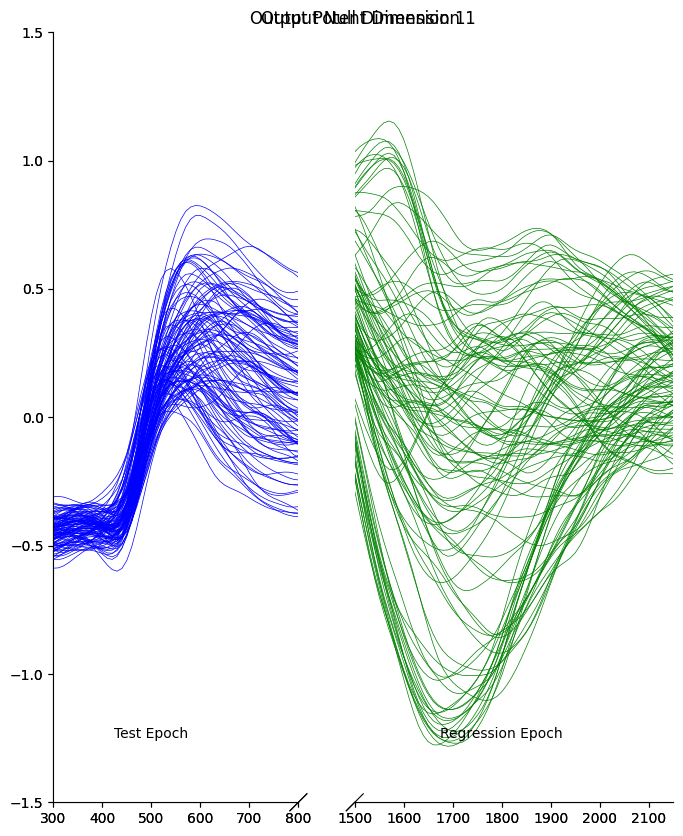

(array([[ 0.08950803, -0.01740284, -0.01965221],
        [-0.35954319, -0.04359888,  0.06809536],
        [-0.40089403,  0.14965701, -0.0104731 ],
        [ 0.10060125,  0.03371188, -0.01271606],
        [-0.09214834, -0.07905336, -0.05702194],
        [ 0.12552493,  0.0383123 , -0.03640499]]),
 array([[-0.50298998,  0.15562994,  0.04522922],
        [-0.48731069,  0.15995965,  0.0480326 ],
        [-0.47430402,  0.16369871,  0.0507238 ],
        ...,
        [ 0.3940492 , -0.13699538,  0.0680509 ],
        [ 0.39364836, -0.13814645,  0.06478792],
        [ 0.3923622 , -0.13902137,  0.06199112]], shape=(7128, 3)),
 array([[ 0.16030944,  0.13219306, -0.01660174, ...,  0.09347966,
          0.019677  , -0.12236011],
        [ 0.15650839,  0.12830148, -0.01266716, ...,  0.0911891 ,
          0.0194526 , -0.12234898],
        [ 0.15338744,  0.12507049, -0.00936338, ...,  0.0893226 ,
          0.01929148, -0.12246543],
        ...,
        [-0.12274053, -0.10632006,  0.00184364, ..., -0.065

In [3]:
pcar.fig_4(J_all_tensor, J_mus_stack, plot = True)

>>> best_lam returning: 0.01


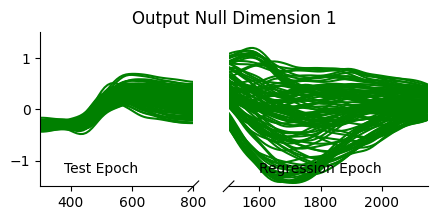

In [12]:
pcar.fig_4_plot(J_all_tensor, J_mus_stack, potent = False)